In [1]:
# pip install scikit-image

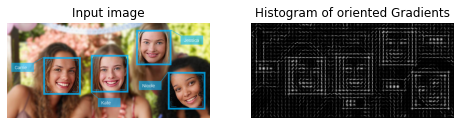

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

image = cv2.imread('c.JPG')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#fd is the feature-descriptor(used to represent the image)
fd,hog_image = hog(image, orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    multichannel=True)

#plot input and hog image
fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(8, 4),sharex=True,
    sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap= plt.cm.gray)
ax1.set_title('Input image')

#rescale histogram for better display

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap= plt.cm.gray)
ax2.set_title('Histogram of oriented Gradients')
plt.show()



In [3]:
len(fd)

11648

In [4]:
image.shape

(418, 896, 3)

Face Detection

In [5]:
import dlib

In [6]:
# pip install face-recognition

In [7]:
import numpy as np

In [8]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np 
import cv2
%matplotlib inline


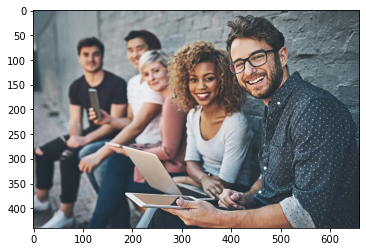

In [25]:
#load the jpg file into a numpy array
#image = face_recognition.load_image_file("name.jpeg")

image = cv2.imread('ex1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [26]:
#find all the faces in the image

face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("found {} face(s) in input image.". format(number_of_faces))

found 5 face(s) in input image.


A face is located at pixel  location top:308 ,Left :122, Bottom:370 , Right:184
A face is located at pixel  location top:390 ,Left :68, Bottom:497 , Right:175
A face is located at pixel  location top:93 ,Left :79, Bottom:136 , Right:122
A face is located at pixel  location top:181 ,Left :61, Bottom:233 , Right:113
A face is located at pixel  location top:216 ,Left :107, Bottom:268 , Right:159


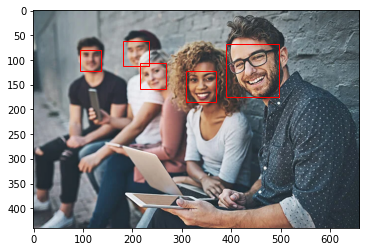

In [27]:
#get axis handle
plt.imshow(image)
ax = plt.gca()

#repeat for all faces found

for face_location in face_locations:
    
    #print the location of each face in this image. Each face is a list of co-ordicates in (top,right , bottom, left ) order.
    
    top,right,bottom,left = face_location
    x,y,w,h = left, top, right, bottom
    print("A face is located at pixel  location top:{} ,Left :{}, Bottom:{} , Right:{}".format(x,y,w,h))
    
    #let's draw a box around the face
    rect = Rectangle((x,y) , w-x, h-y, fill=False, color= 'red')
    ax.add_patch(rect)
    
#show output image
plt.show()

In [28]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np 
import cv2
%matplotlib inline


In [51]:
len(fd)

11648

In [52]:
image.shape

(244, 161, 3)

In [54]:
#Load the known length(create a database)
#face_demo = face_recognition.load_image_file('person_1.jpg')

image = cv2.imread('face_demo.jpg')
face_demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#madona = face_recognition.load_image_file('person_2.jpg')
image = cv2.imread('madona.jpg')
madona = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#madona = face_recognition.load_image_file('person_2.jpg')
image = cv2.imread('mindy_kaling.jpg')
mindy_kaling = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image.shape

(233, 350, 3)

In [84]:
# face encoding of each person. this can fail if no one is found in the photo.
#face_demo_encoding = face_recognition.face_encoding(face_demo)[0]
#madona_encoding = face_recognition.face_encoding(madona)[0]
#mindy_kaling_encoding = face_recognition.face_encoding(mindy_kaling)[0]


face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
madona_encoding = face_recognition.face_encodings(madona)[0]
mindy_kaling_encoding = face_recognition.face_encodings(mindy_kaling)[0]


#create a database of all face encoding

known_face_encoded = [face_demo, madona, mindy_kaling]


(244, 161, 3)

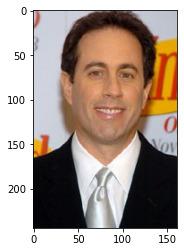

In [71]:
#load the image to check
image = cv2.imread('jerry_seinfeld.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#face encoding
unknown_face_encodings = face_recognition.face_encodings(unknown_image)[0]
image.shape